In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 삼성전자 주가를 사용하겠습니다
samsung = pd.read_csv("삼성전자주가.csv", index_col=0, 
                      parse_dates=True)
samsung

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
2018-01-05,51300,52120,51200,52120,189623
2018-01-08,52400,52520,51500,52020,167673
...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407
2022-12-26,58000,58100,57700,57900,6756411
2022-12-27,58000,58400,57900,58100,10667027


In [5]:
# 2년치 주가만 사용하겠습니다
samsung = samsung.loc["2020":]

samsung

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171
...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407
2022-12-26,58000,58100,57700,57900,6756411
2022-12-27,58000,58400,57900,58100,10667027


In [17]:
# 종가만 사용
samsung_close = samsung[["Close"]].copy()
samsung_close.columns = ["price"]
samsung_close

,price
Date,
2020-01-02,55200
2020-01-03,55500
2020-01-06,55500
2020-01-07,55800
2020-01-08,56800
...,...
2022-12-23,58100
2022-12-26,57900
2022-12-27,58100


In [18]:
# 20일 이평선을 데이터프레임에 추가하겠습니다
samsung_close["ma20"] = samsung_close.rolling(window=20).mean()
samsung_close.tail()

,price,ma20
Date,,
2022-12-23,58100,59785.0
2022-12-26,57900,59675.0
2022-12-27,58100,59550.0
2022-12-28,56600,59270.0
2022-12-29,55300,58905.0


In [20]:
book = samsung_close[["price"]].copy()

# 거래를 기록
book["trade"] = 0
# 거래의 수익률을 기록
book["rtn"] = 1
book

,price,trade,rtn
Date,,,
2020-01-02,55200,0,1
2020-01-03,55500,0,1
2020-01-06,55500,0,1
2020-01-07,55800,0,1
2020-01-08,56800,0,1
...,...,...,...
2022-12-23,58100,0,1
2022-12-26,57900,0,1
2022-12-27,58100,0,1


In [21]:
samsung_close

,price,ma20
Date,,
2020-01-02,55200,NaN
2020-01-03,55500,NaN
2020-01-06,55500,NaN
2020-01-07,55800,NaN
2020-01-08,56800,NaN
...,...,...
2022-12-23,58100,59785.0
2022-12-26,57900,59675.0
2022-12-27,58100,59550.0


In [22]:
# 전략을 구현하겠습니다. 해당 전략은 Event-Driven 전략이라 for문을 통해 구현하면 간편합니다
for date in samsung_close.index:
    # 매수 조건
    if samsung_close.loc[date, "price"] > samsung_close.loc[date, "ma20"]:
        book.loc[date, "trade"] = 1
book

,price,trade,rtn
Date,,,
2020-01-02,55200,0,1
2020-01-03,55500,0,1
2020-01-06,55500,0,1
2020-01-07,55800,0,1
2020-01-08,56800,0,1
...,...,...,...
2022-12-23,58100,0,1
2022-12-26,57900,0,1
2022-12-27,58100,0,1


In [23]:
book.head()

,price,trade,rtn
Date,,,
2020-01-02,55200,0,1
2020-01-03,55500,0,1
2020-01-06,55500,0,1
2020-01-07,55800,0,1
2020-01-08,56800,0,1


In [28]:
book.shift(1)

,price,trade,rtn
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,55200.0,0.0,1.0
2020-01-06,55500.0,0.0,1.0
2020-01-07,55500.0,0.0,1.0
2020-01-08,55800.0,0.0,1.0
...,...,...,...
2022-12-23,59100.0,0.0,1.0
2022-12-26,58100.0,0.0,1.0
2022-12-27,57900.0,0.0,1.0


In [29]:
# book에 기록된 trade일지로 수익을 구하면 됩니다
hold = False

for date in book.index:
    # 포지션 진입(주식 안 가지고 있다가 다음날 매수하는 경우)
    if (book.loc[date, "trade"] == 1) and (book.shift(1).loc[date, "trade"] == 0):
        buy_price = book.loc[date, "price"]
        print("포지션 진입, 매수가: {}, 매수일: {}".format(buy_price, date))
        hold = True
    
    # 포지션 청산 (주식 가지고 있다가 다음날 매도하는 경우)
    elif (book.loc[date, "trade"] == 0) and (book.shift(1).loc[date, "trade"] == 1):
        sell_price = book.loc[date, "price"]
        rt = ((sell_price - buy_price) / buy_price + 1)
        print("포지션 청산, 매도가: {}, 매도일: {}, 수익:{}".format(sell_price, date, rt))
        # 변수 초기화
        hold = False
        buy_price, sell_price = 0,0
    
    # 수익률 계산(주식을 가지고 있는 경우)
    elif hold == True:
        rtn = (book.loc[date, "price"] / book.shift(1).loc[date, "price"])
        book.loc[date, "rtn"] = rtn

포지션 진입, 매수가: 59500, 매수일: 2020-02-05 00:00:00
포지션 청산, 매도가: 59700, 매도일: 2020-02-10 00:00:00, 수익:1.0033613445378151
포지션 진입, 매수가: 59900, 매수일: 2020-02-11 00:00:00
포지션 청산, 매도가: 59800, 매도일: 2020-02-18 00:00:00, 수익:0.998330550918197
포지션 진입, 매수가: 60200, 매수일: 2020-02-19 00:00:00
포지션 청산, 매도가: 59200, 매도일: 2020-02-21 00:00:00, 수익:0.9833887043189369
포지션 진입, 매수가: 48700, 매수일: 2020-04-06 00:00:00
포지션 청산, 매도가: 48500, 매도일: 2020-05-04 00:00:00, 수익:0.9958932238193019
포지션 진입, 매수가: 50300, 매수일: 2020-05-19 00:00:00
포지션 청산, 매도가: 48750, 매도일: 2020-05-22 00:00:00, 수익:0.9691848906560636
포지션 진입, 매수가: 49250, 매수일: 2020-05-26 00:00:00
포지션 청산, 매도가: 49900, 매도일: 2020-06-15 00:00:00, 수익:1.0131979695431472
포지션 진입, 매수가: 52100, 매수일: 2020-06-16 00:00:00
포지션 청산, 매도가: 52000, 매도일: 2020-06-22 00:00:00, 수익:0.9980806142034548
포지션 진입, 매수가: 52900, 매수일: 2020-06-24 00:00:00
포지션 청산, 매도가: 51900, 매도일: 2020-06-25 00:00:00, 수익:0.9810964083175804
포지션 진입, 매수가: 53300, 매수일: 2020-06-26 00:00:00
포지션 청산, 매도가: 52400, 매도일: 2020-06-29 00:00:00, 수익:0.9

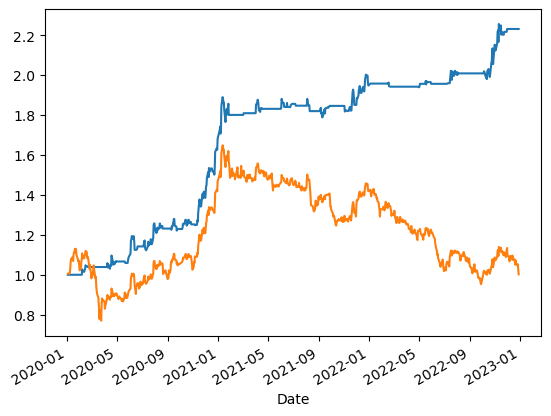

In [39]:
book.rtn.cumprod().plot()
(book.price.pct_change() + 1).cumprod().plot();

In [40]:
samsung

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,55500,56000,55000,55200,12993228
2020-01-03,56000,56600,54900,55500,15422255
2020-01-06,54900,55600,54600,55500,10278951
2020-01-07,55700,56400,55600,55800,10009778
2020-01-08,56200,57400,55900,56800,23501171
...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407
2022-12-26,58000,58100,57700,57900,6756411
2022-12-27,58000,58400,57900,58100,10667027


In [42]:
samsung.Close.pct_change()

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2022-12-23   -0.016920
2022-12-26   -0.003442
2022-12-27    0.003454
2022-12-28   -0.025818
2022-12-29   -0.022968
Name: Close, Length: 742, dtype: float64

In [53]:
y = np.where(samsung.Close.pct_change() > 0, 1, 0)[1:]
y[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [47]:
sum(y == 1), sum(y==0)

(343, 398)

In [48]:
# 이제 예측을 위한 특성(Feature)들을 추가해보자
## 자신이 원하는 특성 어떤 것이든 추가할 수 있다
### 주의) Look-Ahead Bias가 발생하지 않도록 주의를 기울여야 한다!! 

# 고가-저가
samsung["H-L"] = samsung.High - samsung.Low

# 이동 평균(20일)보다 주가가 위에 있는지 아래에 있는지
samsung["ma20"] = samsung.Close.rolling(window=20).mean()
samsung["ma20_over"] = np.where(samsung.ma20 > samsung.Close, 1, 0)

# 주가의 이동 표준편차(moving std)
samsung["ms20"] = samsung.Close.rolling(window=20).std()

# 거래량의 이동 표준편차
samsung["ms20_vol"] = samsung.Volume.rolling(window=20).std()

In [49]:
samsung

,Open,High,Low,Close,Volume,H-L,ma20,ma20_over,ms20,ms20_vol
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,1000,NaN,0,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,1700,NaN,0,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,1000,NaN,0,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,800,NaN,0,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,1500,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,700,59785.0,1,1167.667491,3.315667e+06
2022-12-26,58000,58100,57700,57900,6756411,400,59675.0,1,1237.941840,3.419013e+06
2022-12-27,58000,58400,57900,58100,10667027,500,59550.0,1,1265.535044,3.276263e+06


In [54]:
df = samsung[["H-L", "ma20_over","ms20","ms20_vol"]].copy()

# y는 맨 마지막 데이터의 정답지가 없기 때문에 값이 하나 적다
y = np.append(y, np.nan)

# X,y를 하나로 합치자
df["target"] = y
df

,H-L,ma20_over,ms20,ms20_vol,target
Date,,,,,
2020-01-02,1000,0,NaN,NaN,1.0
2020-01-03,1700,0,NaN,NaN,0.0
2020-01-06,1000,0,NaN,NaN,1.0
2020-01-07,800,0,NaN,NaN,1.0
2020-01-08,1500,0,NaN,NaN,1.0
...,...,...,...,...,...
2022-12-23,700,1,1167.667491,3.315667e+06,0.0
2022-12-26,400,1,1237.941840,3.419013e+06,1.0
2022-12-27,500,1,1265.535044,3.276263e+06,0.0


In [55]:
# Buffer Data를 Drop 해주자
df = df.dropna()
df

,H-L,ma20_over,ms20,ms20_vol,target
Date,,,,,
2020-01-31,2000,1,2355.570106,4.360574e+06,1.0
2020-02-03,2200,1,2233.306494,4.646606e+06,1.0
2020-02-04,2200,1,2084.093896,4.782395e+06,1.0
2020-02-05,1300,0,1906.298425,4.547864e+06,1.0
2020-02-06,1400,0,1759.036818,4.262505e+06,0.0
...,...,...,...,...,...
2022-12-22,1000,1,1126.755940,3.462207e+06,0.0
2022-12-23,700,1,1167.667491,3.315667e+06,0.0
2022-12-26,400,1,1237.941840,3.419013e+06,1.0


In [ ]:
# 정답지와 피쳐 분리
X = df[["H-L", "ma20_over", "ms20", "ms20_vol"]].values
y = df["target"].values